# Multi-layer Neural Newtork with Backpropagation
### Vinicius Pimenta Bernardo (202002447)
### Thiago Werneck Ferreira dos Santos (202003651)

# Import libs

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List

from decimal import *

import pandas as pd

In [ ]:
getcontext().prec = 28

$L$ is the number of layers, including the input and output layers, and $s_L^{(l)}$ is the number of neurons per layer

# Upload training set

In [ ]:
from google.colab import files
uploaded = files.upload()
# Upload classification2.txt, needs to be repeated with every new session

Saving classification2.txt to classification2.txt


In [ ]:
file_name = "classification2.txt"
training_data = uploaded[file_name].decode("utf-8").split("\n")
# Parse data
for i in range(len(training_data)):
    training_data[i] = training_data[i].split(",")
training_data = training_data[:-1]
print(training_data)
print(len(training_data))

[['0.051267', '0.69956', '1'], ['-0.092742', '0.68494', '1'], ['-0.21371', '0.69225', '1'], ['-0.375', '0.50219', '1'], ['-0.51325', '0.46564', '1'], ['-0.52477', '0.2098', '1'], ['-0.39804', '0.034357', '1'], ['-0.30588', '-0.19225', '1'], ['0.016705', '-0.40424', '1'], ['0.13191', '-0.51389', '1'], ['0.38537', '-0.56506', '1'], ['0.52938', '-0.5212', '1'], ['0.63882', '-0.24342', '1'], ['0.73675', '-0.18494', '1'], ['0.54666', '0.48757', '1'], ['0.322', '0.5826', '1'], ['0.16647', '0.53874', '1'], ['-0.046659', '0.81652', '1'], ['-0.17339', '0.69956', '1'], ['-0.47869', '0.63377', '1'], ['-0.60541', '0.59722', '1'], ['-0.62846', '0.33406', '1'], ['-0.59389', '0.005117', '1'], ['-0.42108', '-0.27266', '1'], ['-0.11578', '-0.39693', '1'], ['0.20104', '-0.60161', '1'], ['0.46601', '-0.53582', '1'], ['0.67339', '-0.53582', '1'], ['-0.13882', '0.54605', '1'], ['-0.29435', '0.77997', '1'], ['-0.26555', '0.96272', '1'], ['-0.16187', '0.8019', '1'], ['-0.17339', '0.64839', '1'], ['-0.28283',

reference for this section:

https://buomsoo-kim.github.io/colab/2018/04/15/Colab-Importing-CSV-and-JSON-files-in-Google-Colab.md/

# Weights initialization

There is a separate weight matrix for each layer $l \in L,\space l>1$ so, there will be a matrx $w^{(L)}, \space w^{(L-1)}, \space w^{(L-2)}, \space ..., w^{(2)}$

A matrix $w^{(l)}$ will be used to calculate the activation for that same layer $l$ using the activations from layer $l-1$

In [ ]:
def initializeWeights(layers: List) ->List[np.ndarray]:
    """
    Returns a list of arrays containing random weights
    """
    weights = []
    for l in range(1, len(layers)):
        weights.append(np.random.rand(layers[l], layers[l-1]+1))
    return weights

 # Foward propagation function definition

$z^{(l)}_i=\sum_{j=0}^{s_L^{(l-1)}}w_{ij}^{(l)}y_{j}^{(l-1)}$

for a given $i$, $w_{ij}^{(l)}$ is the line ```[i:]``` from the weight matrix of layer $(l)$, $y_j^{(l-1)}$ is the column o activation values of layer $(l-1)$, and $s_L^{(n)}$ is the number of neurons on a given layer $n$

$\begin{pmatrix}
  w^{(l)}_{i,0} & w^{(l)}_{i,1} & \cdots & w^{(l)}_{i,s_L^{(l-1)}}
\end{pmatrix}
\begin{pmatrix}
  1\\
  y_{1}^{(l-1)}\\
  \vdots\\
  y_{s_L^{(l-1)}}^{(l-1)}
\end{pmatrix}=z_i^{(l)}$

and the activation $y_i^{(l)}$ is $g(z_i^{(l)})=\frac{1}{1+e^{z_i^{(l)}}}$

In [ ]:
def transfer(weights: np.ndarray, activations: np.ndarray) ->float:
    """
    Single neuron weighted sum
    """
    transfer = weights[0] # bias weight * 1
    transfer += np.matmul(weights[1:], activations)[0]
    return transfer

def activation(transfer: float) ->float:
    """
    Single neuron activation function
    """
    return (1/(1+math.exp(-transfer)))

compute $z^{(1)}$ and $y^{(1)}$ using $x^{(m)}$ for one $m$ corresponding to a single training set and then $z^{(l)}$ and $y^{(l)}$ using $y^{(l-1)}$ for $l\in2...L$

In [ ]:
def fowardPropagate(inputs: np.ndarray, weights: List[np.ndarray], layers: List) ->(List[np.ndarray], List[np.ndarray]):
    """Propagate the input throughout the network

    The second layer activation is calculated using the inputs, which are the activation of the first layer,
    and the remaining layers activation values are calculated using the values from previous layer
    @param inputs: A single set of inputs from the training set as a column
    @param weights: The network neurons weights
    @param layers: List containing number of units per layer
    @return neuronsNetSum, neuronsActivation: The propagated transfer and activation values of neurons
    """
    neuronsTransfer = []
    neuronsActivation = []
    layerTransfer = np.array([[transfer(w[0][i,:], inputs)] for i in range(layers[1])])
    layerActivation = np.array([[activation(layerTransfer[i])] for i in range(layers[1])])
    neuronsTransfer.append(layerTransfer)
    neuronsActivation.append(layerActivation)
    
    for l in range(2, len(layers)):
        layerTransfer = np.array([[transfer(w[l-1][i,:], neuronsActivation[l-2])] for i in range(layers[l])])
        layerActivation = np.array([[activation(layerTransfer[i])] for i in range(layers[l])])
        neuronsTransfer.append(layerTransfer)
        neuronsActivation.append(layerActivation)

    return neuronsTransfer, neuronsActivation

# Error calculation

$J(w) = \frac{1}{2}*\sum_{i=1}^{s_L^{(L)}}(y_i^{(L)}-t_i)^2$

Considering the error function as:

$E = \frac{1}{2}*(y_i^{(L)}-t_i)^2$

for a single neuron $i$ on the output layer, and as:

$E=\frac{1}{2n}\sum_{m=1}^n (y^{(L)}_i-t^{(m)}_i)$

for $n$ training examples.

In [ ]:
def calculateSumError(outputs: np.ndarray, expected: np.ndarray, layers: List) ->float:
    """
    Returns the accumulated error J(w) of the last layer
    """
    sumError = 0.0
    for i in range(layers[-1]):
        sumError += ((outputs[i][0] - expected[i][0]) ** 2) * 0.5
    return sumError

# Backpropagatin function definition

Considering the error function as:

$E = \frac{1}{2}*(y_i^{(L)}-t_i)^2$

for a single neuron $i$ on the output layer.

The derivative of the error is:

$\frac{\delta E}{\delta w^{(l)}_{ij}} = \frac{\delta E}{\delta y^{(l)}_i}\frac{\delta y^{(l)}_i}{\delta z^{(l)}_i}\frac{\delta z^{(l)}_i}{\delta w^{(l)}_{ij}}=\frac{\delta E}{\delta y^{(l)}_i}\frac{\delta y^{(l)}_i}{\delta z^{(l)}_i}y^{(l-1)}_j=\delta^{(l)}_iy^{(l-1)}_j$

$\frac{\delta y_i^{(l)}}{\delta z_i^{(l)}} = y_i^{(l)}(1-y_i^{(l)})$ when $y_i^{(l)}$ is $g(z_i^{(l)})=\frac{1}{1+e^{-z_i^{(l)}}}$

$\delta^{(l)}_j=\frac{\delta E}{\delta y^{(l)}_j}\frac{\delta y^{(l)}_j}{\delta z^{(l)}_j}=\begin{cases}(y^{(l)}_j-t_j)y^{(l)}_j(1-y^{(l)}_j), \space l=L \\ (\sum_{i=1}^{s_L^{(l+1)}}w_{ij}^{(l+1)}\delta_{i}^{(l+1)})y^{(l)}_j(1-y^{(l)}_j), \space l<L\end{cases}$

In [ ]:
def activationDerivate(activation: float) ->float:
    """
    Single neuron activation derivate function
    """
    return activation*(1.0 - activation)

In [ ]:
def backPropagateError(outputs: np.ndarray, activations: List[np.ndarray], weights: List[np.ndarray], layers: List) ->List[np.ndarray]:
    """Backpropagate the error throughout the network

    The last layer error is calculated using the expected outputs from the training examples,
    and the remaining layers error values are calculated using the values from upfront layer
    @param outputs: A single set of outputs from the training set as a column
    @param activation: Calculated using the foward propagation
    @param weights: The network neurons weights
    @param layers: List containing number of units per layer
    @return neuronsErrorDerivatives: The backpropagated error values of neurons
    """
    neuronsErrorDerivatives = []
    layerErrorDerivative = np.array([[((activations[len(layers)-2][i,0] - outputs[i,0])*activationDerivate(activations[len(layers)-2][i,0]))] for i in range(layers[len(layers)-1])])
    neuronsErrorDerivatives.append(layerErrorDerivative)

    for l in reversed(range(1, len(layers)-1)):
        layerErrorDerivative = np.matmul(np.transpose(weights[l][:,1:]), neuronsErrorDerivatives[0])*activationDerivate(activations[l-1])
        neuronsErrorDerivatives.insert(0, layerErrorDerivative)

    return neuronsErrorDerivatives

# Update weights

$\Delta^{(l)}_{ij} = \Delta^{(l)}_{ij}+y^{(l-1)}_j \delta^{(l)}_i$

In [ ]:
def initializeDelta(layers: List) ->List[np.ndarray]:
    """
    Returns a list of arrays containing zeros
    """
    Delta = []
    for l in range(1, len(layers)):
        Delta.append(np.zeros((layers[l], layers[l-1]+1)))
    return Delta

def updateDelta(inputs: np.ndarray, Delta: List[np.ndarray], activations: List[np.ndarray], delta: List[np.ndarray], layers: List) ->List[np.ndarray]:
    """
    Returns the updated value of Delta using delta and activation values
    """
    updatedDelta = []
    updatedDelta.append(Delta[0] + np.matmul(delta[0], np.array([np.append(np.array([[1]]), inputs)]) ) )
    for l in range(2, len(layers)):
        updatedDelta.append(Delta[l-1] + np.matmul(delta[l-1], np.array([np.append(np.array([[1]]), activations[l-2])]) ) )
    return updatedDelta

$D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij}+\lambda w^{(l)}_{ij}$ for $j\neq 0$

and

$D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij}$ for $j=0$

In [ ]:
def regRateMatrix(regRate: float, layers: List) ->List[np.array]:
    """
    Returns the regularization matrix with the first columns being 0.0 and lambda for the rest
    """
    regRates = []
    for l in range(1, len(layers)):
        line = np.append(np.array([0.0]), np.linspace(regRate, regRate, layers[l-1]))
        grid = np.array([line])
        for _ in range(1, layers[l]):
            grid = np.append(grid, [line], axis=0)
        regRates.append(grid)

    return regRates

def calculateWeightAdjust(Delta: List[np.ndarray], weights: List[np.ndarray], layers: List, num_examples: float, regRate: float=0.0) ->List[np.ndarray]:
    """
    Returns matrixes containing the cost derivate for each weight
    """
    weightsAdjust = []
    regRates = regRateMatrix(regRate, layers)
    for l in range(1, len(layers)):
        layerWeightAdjust = Delta[l-1]*(1.0/num_examples) + weights[l-1]*regRates[l-1]
        weightsAdjust.append(layerWeightAdjust)
    
    return weightsAdjust

# Approximate gradient

In [ ]:
def initializeGradApprox(layers: List) ->List[np.ndarray]:
    """
    Returns a list of arrays containing zeros
    """
    gradApprox = []
    for l in range(1, len(layers)):
        gradApprox.append(np.zeros((layers[l], layers[l-1]+1), dtype=Decimal))
    return gradApprox

def transferNumerical(weights: np.ndarray, activations: np.ndarray) ->Decimal:
    """
    Single neuron weighted sum
    """
    transfer = Decimal(weights[0]) # bias weight * 1
    transfer += Decimal(np.matmul(weights[1:], activations)[0])
    return transfer

def activationNumerical(transfer: Decimal) ->Decimal:
    """
    Single neuron activation function
    """
    return (Decimal(1.0)/Decimal((1.0+math.exp(-transfer))))

def calculateSumErrorNumerical(outputs: np.ndarray, expected: np.ndarray, layers: List) ->Decimal:
    sumError = Decimal(0.0)
    for i in range(layers[-1]):
        sumError += Decimal(((outputs[i][0] - expected[i][0]) ** 2)) * Decimal(0.5)
    return sumError

def activationDerivateNumerical(activation: float) ->Decimal:
    """
    Single neuron activation derivate function
    """
    return Decimal(activation)*(Decimal(1.0 - activation))

def fowardPropagateNumerical(inputs: np.ndarray, weights: List[np.ndarray], layers: List) ->(List[np.ndarray], List[np.ndarray]):
    """Propagate the input throughout the network with Decimal instead of float

    The second layer activation is calculated using the inputs, which are the activation of the first layer,
    and the remaining layers activation values are calculated using the values from previous layer
    @param inputs: A single set of inputs from the training set as a column
    @param weights: The network neurons weights
    @param layers: List containing number of units per layer
    @return neuronsNetSum, neuronsActivation: The propagated transfer and activation values of neurons
    """
    neuronsTransfer = []
    neuronsActivation = []
    layerTransfer = np.array([[transfer(w[0][i,:], inputs)] for i in range(layers[1])], dtype=Decimal)
    layerActivation = np.array([[activation(layerTransfer[i])] for i in range(layers[1])], dtype=Decimal)
    neuronsTransfer.append(layerTransfer)
    neuronsActivation.append(layerActivation)
    
    for l in range(2, len(layers)):
        layerTransfer = np.array([[transfer(w[l-1][i,:], neuronsActivation[l-2])] for i in range(layers[l])], dtype=Decimal)
        layerActivation = np.array([[activation(layerTransfer[i])] for i in range(layers[l])], dtype=Decimal)
        neuronsTransfer.append(layerTransfer)
        neuronsActivation.append(layerActivation)

    return neuronsTransfer, neuronsActivation

def calculateGradApprox(weights: List[np.ndarray], inputs: np.ndarray, expected: np.ndarray, layers: List) ->List[np.ndarray]:
    epsilon = 0.00001
    gradApprox = []
    for l in range(1, len(layers)):
        layer_weights = np.zeros((layers[l], layers[l-1]+1), dtype=Decimal)
        for i in range(0, layers[l]):
            for j in range(0, layers[l-1]+1):
                w_plus = np.copy(weights)
                w_minus = np.copy(weights)
                w_plus[l-1][i,j] += epsilon
                w_minus[l-1][i,j] -= epsilon
                z_plus, y_plus = fowardPropagateNumerical(inputs, w_plus, layers)
                sumError_plus = calculateSumErrorNumerical(y_plus[-1], expected, layers)
                z_minus, y_minus = fowardPropagateNumerical(inputs, w_minus, layers)
                sumError_minus = calculateSumErrorNumerical(y_minus[-1], expected, layers)
                dJ_dwij = (Decimal(sumError_plus) - Decimal(sumError_minus)) / Decimal((2.0 * epsilon))
                layer_weights[i, j] += dJ_dwij
        gradApprox.append(layer_weights)
    return gradApprox

# Run training

### Compare numerical and standard gradient

In [ ]:
######################################################################
# Run one epoch to compare numerical gradient with calculated derivate
######################################################################
# s_l always needs 2 at beginning and 1 at the end to comply with data format
# s_l = [2, 1]
s_l = [2, 3, 3, 1]
initial_weights = initializeWeights(s_l)
w = initial_weights.copy()
lambdaRate = 0.0
alphaRate = 1.0
costsList = []

# num_training = len(training_data)
num_training = 100

print("Network shape: s_l = ", end='')
print(s_l)
print("Training sets used: " + str(num_training))
print("Alpha rate: " + str(alphaRate) + " Lambda rate: " + str(lambdaRate))
print("")

print("Initial weights")
for s in range(len(w)):
    print("w^(%s) " % (s+2))
    print(w[s])

# Init stuff with 0
Delta = initializeDelta(s_l)
gradApproxSum = initializeGradApprox(s_l)
cost = 0
# Run one epoch
for m in range(num_training):
    x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
    t = np.array([[float(training_data[m][2])]])
    z, y = fowardPropagate(x, w, s_l)
    cost += calculateSumError(y[-1], t, s_l)
    delta = backPropagateError(t, y, w, s_l) 
    Delta = updateDelta(x, Delta, y, delta, s_l)
    gradApprox = calculateGradApprox(w, x, t, s_l)
    for s in range(len(gradApprox)):
        gradApproxSum[s] = gradApproxSum[s] + gradApprox[s]
cost = cost/num_training
costsList.append(cost)
D = calculateWeightAdjust(Delta, w, s_l, num_training, lambdaRate)

# Print both derivates (calculated and numerical)
print("\nCost derivates")
for s in range(len(D)):
    print("D^(%s) " % (s+2))
    print(D[s])
for s in range(len(gradApproxSum)):
    gradApproxSum[s] = gradApproxSum[s] * Decimal((1.0/num_training))
print("\nApproximate derivates (numerical method)")
for s in range(len(gradApproxSum)):
    print("D_approx^(%s) " % (s+2))
    print(gradApproxSum[s])

# Adjust weights using derivate
for s in range(len(w)):
    w[s] = np.copy(w[s] - alphaRate * D[s])
print("\nFinal weights after training")
for s in range(len(w)):
    print("w^(%s) " % (s+2))
    print(w[s])

# Caculate the cost one more time for final weights
cost = 0
for m in range(num_training):
    x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
    t = np.array([[float(training_data[m][2])]])
    z, y = fowardPropagate(x, w, s_l)
    cost += calculateSumError(y[-1], t, s_l)
cost = cost/num_training
costsList.append(cost)

print("\nCosts for all epochs")
print(costsList)

Network shape: s_l = [2, 3, 3, 1]
Training sets used: 100
Alpha rate: 1.0 Lambda rate: 0.0

Initial weights
w^(2) 
[[0.76890752 0.61723569 0.29711479]
 [0.45473856 0.09396039 0.91075803]
 [0.14828925 0.00549917 0.4469605 ]]
w^(3) 
[[0.09416079 0.1708389  0.42771098 0.69539482]
 [0.4089891  0.51707435 0.84838957 0.89955105]
 [0.81014526 0.89925213 0.10174644 0.57163114]]
w^(4) 
[[0.49278337 0.78461041 0.06438325 0.38850874]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)



Cost derivates
D^(2) 
[[4.85002135e-04 1.24137201e-04 7.86920625e-05]
 [5.89547668e-04 2.12324010e-04 5.24324299e-05]
 [1.23256172e-03 4.27562964e-04 2.31061909e-04]]
D^(3) 
[[0.00569741 0.00418193 0.00371457 0.0031902 ]
 [0.00026738 0.00019498 0.00017075 0.0001478 ]
 [0.0015997  0.00116895 0.00103929 0.00089414]]
D^(4) 
[[0.03529393 0.02502341 0.03045698 0.03052703]]

Approximate derivates (numerical method)
D_approx^(2) 
[[Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]
 [Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]
 [Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]]
D_approx^(3) 
[[Decimal('0E-59') Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]
 [Decimal('0E-59') Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]
 [Decimal('0E-59') Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]]
D_approx^(4) 
[[Decimal('0E-59') Decimal('0E-59') Decimal('0E-59') Decimal('0E-59')]]

Final weights after training
w^(2) 
[[0.76842252 0.61711155 0.2970361 ]
 [0.45414901 0.0937480

### Train network

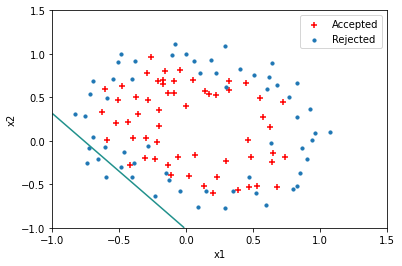

In [ ]:
# Initialize weights and plot initial decision frontier
# s_l always needs 2 at beginning and 1 at the end to comply with data format
# s_l = [2, 1]
s_l = [2, 3, 3, 1]
initial_weights = initializeWeights(s_l)
w = initial_weights.copy()

# Plotando fronteira de decisão
x1s = np.linspace(-1,1.5,50)
x2s = np.linspace(-1,1.5,50)
zs=np.zeros((len(x1s),len(x2s)))

for i in range(len(x1s)):
    for j in range(len(x2s)):
        xs = np.array([[x1s[i]],[x2s[j]]])
        zss, yss = fowardPropagate(xs, w, s_l)
        zs[i,j] = zss[-1][0,0] # saida do modelo antes de aplicar a função sigmoide 
plt.contour(x1s,x2s,np.transpose(zs),0)

df=pd.read_csv("classification2.txt", header=None)

ins=df.iloc[:,:-1].values
outs=df.iloc[:,-1].values
pos , neg = (outs==1).reshape(118,1) , (outs==0).reshape(118,1)
plt.scatter(ins[pos[:,0],0],ins[pos[:,0],1],c="r",marker="+")
plt.scatter(ins[neg[:,0],0],ins[neg[:,0],1],marker="o",s=10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["Accepted","Rejected"],loc=0)

Network shape: s_l = [2, 3, 3, 1]
Training sets used: 100
Alpha rate: 1.0 Lambda rate: 0.0
Training epochs: 100

Initial weights
w^(2) 
[[0.62683569 0.75802    0.46484621]
 [0.65330586 0.53143872 0.058914  ]
 [0.20692916 0.51821792 0.78195653]]
w^(3) 
[[ 0.79863793  0.66006281 -0.02730273  0.35212904]
 [ 0.6894584   0.55156146  0.55914488  0.36325528]
 [ 0.18035378  0.29482936  0.91732882  0.70016568]]
w^(4) 
[[-0.08870878  0.36470146 -0.12562009 -0.16664884]]

Final weights after training
w^(2) 
[[0.62814554 0.75662069 0.46637834]
 [0.65152295 0.53440482 0.05689446]
 [0.20637679 0.51853517 0.78133146]]
w^(3) 
[[ 0.8013996   0.6589997  -0.02882721  0.35204467]
 [ 0.68818462  0.5514592   0.55925014  0.36288534]
 [ 0.17803473  0.29434282  0.91722418  0.69926472]]
w^(4) 
[[-0.08161129  0.36157076 -0.13104659 -0.17712583]]

Costs for all training epochs
[0.12494262758382557, 0.12494188634472353, 0.12494139053835132, 0.12494105642778486, 0.12494082884956795, 0.12494067146173993, 0.124940560

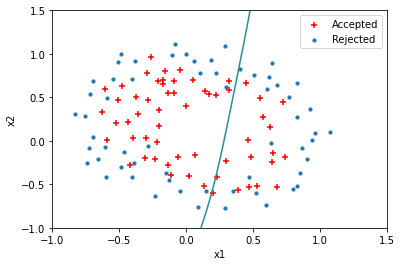

In [ ]:
num_epochs = 100
lambdaRate = 0.0
alphaRate = 1.0

costsList = []
num_training = 100 # Maximum is 118
num_validation = len(training_data) - num_training

print("Network shape: s_l = ", end='')
print(s_l)
print("Training sets used: " + str(num_training))
print("Alpha rate: " + str(alphaRate) + " Lambda rate: " + str(lambdaRate))
print("Training epochs: " + str(num_epochs), end="\n\n")

# Actual training starts here
print("Initial weights")
for s in range(len(w)):
    print("w^(%s) " % (s+2))
    print(w[s])

# Train num_epoch times using the training set
for epoch in range(num_epochs):
    Delta = initializeDelta(s_l)
    cost = 0
    for m in range(int(num_validation/2), int(num_training+(num_validation/2))):
        x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
        t = np.array([[float(training_data[m][2])]])
        z, y = fowardPropagate(x, w, s_l)
        cost += calculateSumError(y[-1], t, s_l)
        delta = backPropagateError(t, y, w, s_l) 
        Delta = updateDelta(x, Delta, y, delta, s_l)
    cost = cost/num_training
    D = calculateWeightAdjust(Delta, w, s_l, num_training, lambdaRate)
    for s in range(len(w)):
        w[s] = np.copy(w[s] - alphaRate*D[s])
    costsList.append(cost)

# Caculate the cost one more time for final epoch
cost = 0
for m in range(int(num_validation/2), int(num_training+(num_validation/2))):
    x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
    t = np.array([[float(training_data[m][2])]])
    z, y = fowardPropagate(x, w, s_l)
    cost += calculateSumError(y[-1], t, s_l)
cost = cost/num_training
costsList.append(cost)

print("\nFinal weights after training")
for s in range(len(w)):
    print("w^(%s) " % (s+2))
    print(w[s])

print("\nCosts for all training epochs")
print(costsList)

# Validation
print("Validation test")
hits = 0.0
for m in range(int(num_validation/2)):
    x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
    t = np.array([[float(training_data[m][2])]])
    z, y = fowardPropagate(x, w, s_l)
    if (abs(t[0,0]-y[1][0,0]) <= 0.5):
        hits += 1.0
    print("Training data[" + str(m) + "]: Network output: " + str(y[-1][0,0]) + " Expected output: " + str(t[0,0]))
for m in range(int(num_training+(num_validation/2)), int(len(training_data))):
    x = np.array([[float(training_data[m][0])],[float(training_data[m][1])]])
    t = np.array([[float(training_data[m][2])]])
    z, y = fowardPropagate(x, w, s_l)
    if (abs(t[0,0]-y[1][0,0]) <= 0.5):
        hits += 1.0
    print("Training data[" + str(m) + "]: Network output: " + str(y[-1][0,0]) + " Expected output: " + str(t[0,0]))
accuracy = hits / num_validation
print("Model accuracy: " + str(accuracy))

# Plotando fronteira de decisão
x1s = np.linspace(-1,1.5,200)
x2s = np.linspace(-1,1.5,200)
zs=np.zeros((len(x1s),len(x2s)))

for i in range(len(x1s)):
    for j in range(len(x2s)):
        xs = np.array([[x1s[i]],[x2s[j]]])
        zss, yss = fowardPropagate(xs, w, s_l)
        zs[i,j] = zss[-1][0,0] # saida do modelo antes de aplicar a função sigmoide 
plt.contour(x1s,x2s,np.transpose(zs),0)

df=pd.read_csv("classification2.txt", header=None)

ins=df.iloc[:,:-1].values
outs=df.iloc[:,-1].values
pos , neg = (outs==1).reshape(118,1) , (outs==0).reshape(118,1)
plt.scatter(ins[pos[:,0],0],ins[pos[:,0],1],c="r",marker="+")
plt.scatter(ins[neg[:,0],0],ins[neg[:,0],1],marker="o",s=10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["Accepted","Rejected"],loc=0)